In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
from import_me import *

In [2]:
photo_path = "board_top_view2.jpg"

In [3]:
img_orig = cv2.imread(photo_path, 1)
#img_orig = cv2.imread("board_hard2.jpg", 1)
img = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
gs = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)

### <font color = blue> Função pronta mas não funciona quando tem peças...

In [4]:
corners = cv2.findChessboardCorners(img, (3, 3))[1]

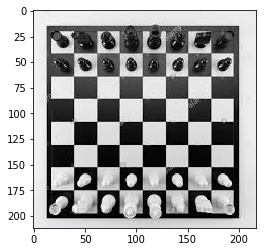

In [5]:
plt.imshow(cv2.drawChessboardCorners(img, (3, 3), corners, True))

In [6]:
# [cv2.circle(img, (corners[i][0][0], corners[i][0][1]) , 5, (0, 0, 0), thickness = 5) for i in range(len(corners))]
# plt.imshow(img)

In [7]:
img_orig = cv2.imread(photo_path, 1)
img = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
gs = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)
img_copy = img.copy()

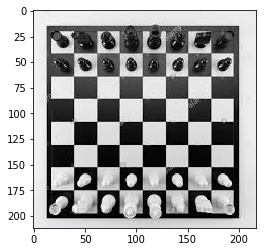

In [8]:
plt.imshow(img)

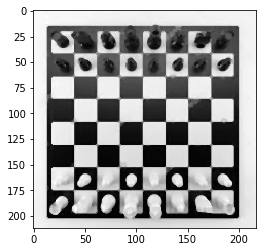

In [9]:
mB = cv2.medianBlur(gs, 3)

plt.imshow(mB, cmap = "gray")

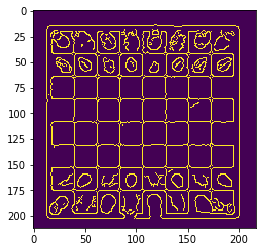

In [10]:
bordas = cv2.Canny(mB, 50, 200)
bordas_copia = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)

plt.imshow(bordas)

In [11]:
linhas = cv2.HoughLines(bordas, 0.5, np.pi / 180, 50, None, 0, 0)

In [12]:
linhas.shape

(28, 1, 2)

In [13]:
mask = np.zeros(gs.shape, dtype = np.uint8)

for i in range(0, len(linhas)):
    rho = linhas[i][0][0]
    theta = linhas[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(bordas_copia, pt1, pt2, (0,0,255), 2, cv2.LINE_AA)

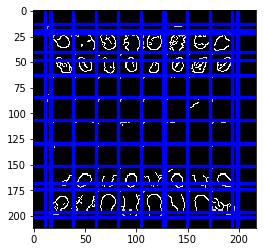

In [14]:
plt.imshow(bordas_copia)

In [15]:
for i in range(0, len(linhas)):
    rho = linhas[i][0][0]
    theta = linhas[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(mask, pt1, pt2, 255, 1, cv2.LINE_AA)

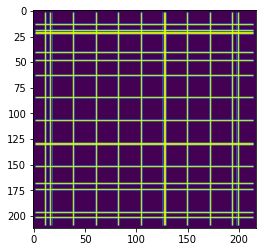

In [16]:
plt.imshow(mask)

In [17]:
segmented = segment_by_angle_kmeans(linhas)
intersections = np.squeeze(np.array(segmented_intersections(segmented)))

In [18]:
for inter in intersections:
    cv2.circle(img, (inter[0], inter[1]), 5, (0, 0, 255), -1)

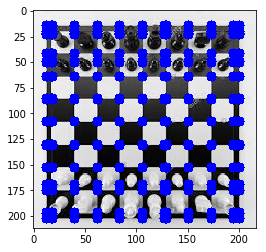

In [19]:
plt.imshow(img)

In [20]:
from sklearn.cluster import KMeans
from itertools import product


X = np.linspace(0, img.shape[0], num = 9)
Y = np.linspace(0, img.shape[1], num = 9)
init = np.array(list(product(X, Y)))

model = KMeans(n_clusters = 9*9)

In [21]:
model.fit(intersections)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=81, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
model.cluster_centers_.shape

(81, 2)

In [23]:
for inter in model.cluster_centers_:
    cv2.circle(img_copy, (int(inter[0]), int(inter[1])), 5, (0, 0, 255), -1)

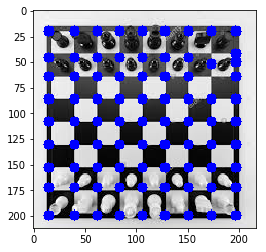

In [24]:
plt.imshow(img_copy)

In [25]:
model.cluster_centers_

array([[197.5,  20. ],
       [ 84. , 130.5],
       [ 40. ,  20. ],
       [197.5, 172. ],
       [106. ,  20. ],
       [ 40. , 153. ],
       [173. ,  86. ],
       [128.5, 130.5],
       [128.5, 199.5],
       [ 15.5,  64. ],
       [ 84. ,  64. ],
       [128.5,  20. ],
       [ 40. , 199.5],
       [151. ,  46. ],
       [ 15.5, 108. ],
       [197.5, 130.5],
       [128.5,  46. ],
       [ 84. , 199.5],
       [197.5, 199.5],
       [ 15.5, 172. ],
       [151. , 172. ],
       [128.5, 172. ],
       [197.5,  42. ],
       [ 15.5,  20. ],
       [ 15.5, 130.5],
       [ 84. , 172. ],
       [173. ,  20. ],
       [128.5,  86. ],
       [ 62. ,  20. ],
       [ 15.5, 199.5],
       [151. , 130.5],
       [ 84. ,  20. ],
       [ 84. , 108. ],
       [197.5,  86. ],
       [ 15.5,  46. ],
       [ 40. ,  86. ],
       [151. ,  20. ],
       [173. ,  52. ],
       [173. , 130.5],
       [106. , 172. ],
       [ 40. , 130.5],
       [ 40. ,  46. ],
       [173. , 199.5],
       [ 15

In [232]:
sorted(model.cluster_centers_,key=lambda x: x[1])

[array([197.11111111,   5.        ]),
 array([57.25,  5.  ]),
 array([10.4,  5. ]),
 array([112.,   5.]),
 array([170.5,   5. ]),
 array([85.5,  5. ]),
 array([28.,  5.]),
 array([217.5,   5. ]),
 array([139.,   5.]),
 array([12.16666667, 31.5       ]),
 array([85.5, 31.5]),
 array([170.5,  31.5]),
 array([112. ,  31.5]),
 array([57. , 31.5]),
 array([217.5,  31.5]),
 array([31.5, 31.5]),
 array([139. ,  31.5]),
 array([197.11111111,  31.5       ]),
 array([197.11111111,  57.        ]),
 array([217.5,  57. ]),
 array([139. ,  57.5]),
 array([170.5,  57.5]),
 array([85.5, 58. ]),
 array([111.66666667,  58.        ]),
 array([57. , 58.5]),
 array([25.5, 58.5]),
 array([ 8.5, 59. ]),
 array([85.5, 84.5]),
 array([170.5,  84.5]),
 array([25.5, 84.5]),
 array([56.75, 84.5 ]),
 array([197.11111111,  84.5       ]),
 array([111.66666667,  84.5       ]),
 array([217.5,  84.5]),
 array([139. ,  84.5]),
 array([ 8.5, 84.5]),
 array([217.5, 111.5]),
 array([ 25.5, 111.5]),
 array([170.5, 111.5]),
